In [2]:
# Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [3]:
# Downloading nltk Stopwords and Wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
Reading 1st datasets 

In [4]:
Dataset1 = pd.read_csv('news.csv')

In [5]:
Dataset1.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
Dataset1.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [9]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [10]:
Dataset1['Article'] = Dataset1['title']+Dataset1['text']

In [13]:
#Shuffle 100%
Dataset1.sample(frac=1)

,Unnamed: 0,title,text,label,Article
413,3638,US officials scanning terror databases in sear...,U.S. counterterrorism officials are reviewing ...,REAL,US officials scanning terror databases in sear...
3454,1340,How Ted Cruz outfoxed Donald Trump in Iowa,"It was on a hot July day in 2013, six months a...",REAL,How Ted Cruz outfoxed Donald Trump in IowaIt w...
3608,3935,EgyptAir Flight 804: Final moments questioned,(CNN) The search for EgyptAir Flight 804 conti...,REAL,EgyptAir Flight 804: Final moments questioned(...
6078,9813,"Hillary Clinton Tops ""Islamist Money in Politi...","Hillary Clinton Tops ""Islamist Money in Politi...",FAKE,"Hillary Clinton Tops ""Islamist Money in Politi..."
5389,2886,How Obama Abandoned Democracy in Iraq,W hen trying to explain the current unrest in ...,REAL,How Obama Abandoned Democracy in IraqW hen try...
...,...,...,...,...,...
5765,1758,Trump vows to win: 'I'm not going anywhere',"""I'm not going anywhere, I'm leading every pol...",REAL,"Trump vows to win: 'I'm not going anywhere'""I'..."
975,3809,Obama administration announces halt on new coa...,The Obama administration announced Friday it w...,REAL,Obama administration announces halt on new coa...
5740,8586,"Distracted by Election 2016, No One Resisted t...",\nBy Nathaniel Mauka\nCongress overwhelmingly ...,FAKE,"Distracted by Election 2016, No One Resisted t..."
1967,7252,How To Repair Strained Or Broken Relationships,A subject not often discussed is the topic of ...,FAKE,How To Repair Strained Or Broken Relationships...


In [14]:
Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

C:\Users\vishw\AppData\Local\Temp/ipykernel_15428/818584941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\vishw\AppData\Local\Temp/ipykernel_15428/818584941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [15]:
Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

In [16]:
Dataset1

,Article,label
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathyU.S...,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matte...,1
...,...,...
6330,State Department says it can't find emails fro...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...",1


In this step we will clean the data that will be used for training. The cleaning will involve these steps- 1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 2.Remove all the numeric text, urls

In [18]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [19]:
# Applying the wordpre method to the dataset
Dataset1['Article'] = Dataset1['Article'].apply(wordpre)

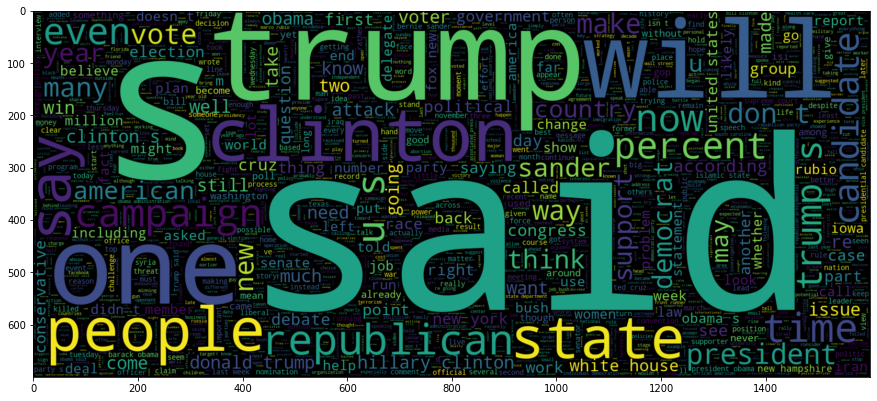

In [22]:
# word used in real news
plt.figure(figsize = (15,15))
wc=WordCloud(max_words = 2000, width=1600, height=700,stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label == 1].Article))
plt.imshow(wc,interpolation='bilinear')

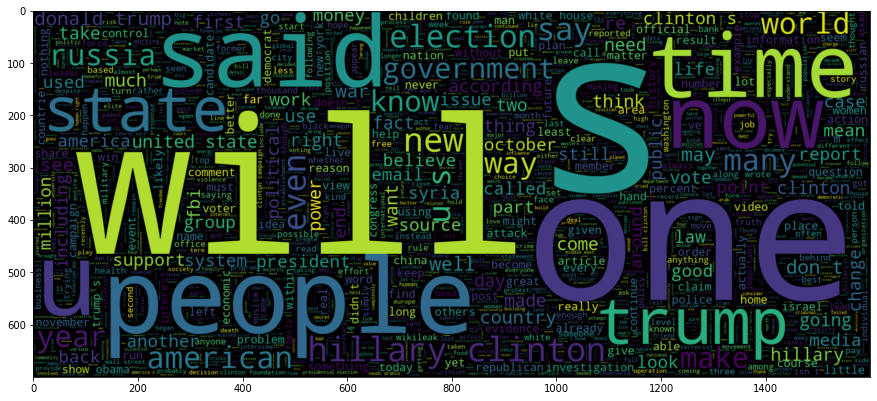

In [23]:
# word used in fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [24]:
Dataset2_true = pd.read_csv('True.csv')
Dataset2_fake = pd.read_csv('Fake.csv')

In [25]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [26]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [30]:
# counting by subject in real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
# Getting total rwos
print(f"total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
total Records:	21417
